<a href="https://colab.research.google.com/github/BUGATAASHWINI/ML-Training-/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("/content/Housing.csv")

print(df.head())
print(df.info())
print(df.describe())

      price  area  bedrooms  ...  parking  prefarea furnishingstatus
0  13300000  7420         4  ...        2       yes        furnished
1  12250000  8960         4  ...        3        no        furnished
2  12250000  9960         3  ...        2       yes   semi-furnished
3  12215000  7500         4  ...        3       yes        furnished
4  11410000  7420         4  ...        2        no        furnished

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    objec

In [9]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [10]:
df = df.dropna()

In [12]:
features = ['area', 'bedrooms', 'bathrooms']
target = 'price'

X = df[features]
y = df[target]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Intercept: 59485.379208717495
Coefficients: {'area': np.float64(345.4665700831111), 'bedrooms': np.float64(360197.6504575056), 'bathrooms': np.float64(1422319.657641412)}
Mean Squared Error: 2750040479309.0522
R² Score: 0.4559299118872445


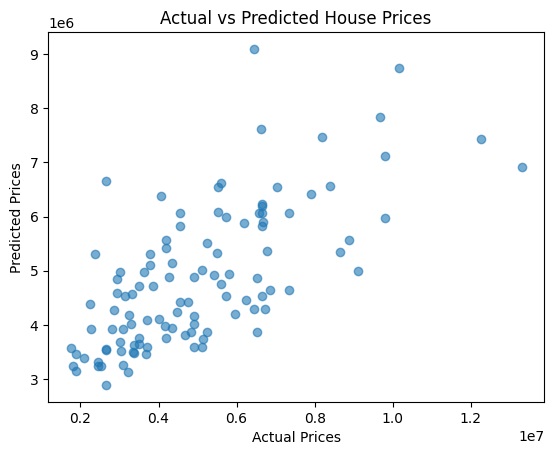

In [15]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [17]:
X_simple = df[['area']]   # independent variable
y = df['price']           # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

y_pred_simple = lr_simple.predict(X_test)

print("\n📌 Simple Linear Regression:")
print("Intercept:", lr_simple.intercept_)
print("Coefficient:", lr_simple.coef_)
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R² Score:", r2_score(y_test, y_pred_simple))


📌 Simple Linear Regression:
Intercept: 2512254.2639593435
Coefficient: [425.72984194]
MSE: 3675286604768.185
R² Score: 0.27287851871974644


In [19]:
features = ['area', 'bedrooms', 'bathrooms']
X_multi = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_multi = lr_multi.predict(X_test)

print("\n📌 Multiple Linear Regression:")
print("Intercept:", lr_multi.intercept_)
print("Coefficients:", list(zip(features, lr_multi.coef_)))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))



📌 Multiple Linear Regression:
Intercept: 59485.379208717495
Coefficients: [('area', np.float64(345.4665700831111)), ('bedrooms', np.float64(360197.6504575056)), ('bathrooms', np.float64(1422319.657641412))]
MSE: 2750040479309.0522
R² Score: 0.4559299118872445


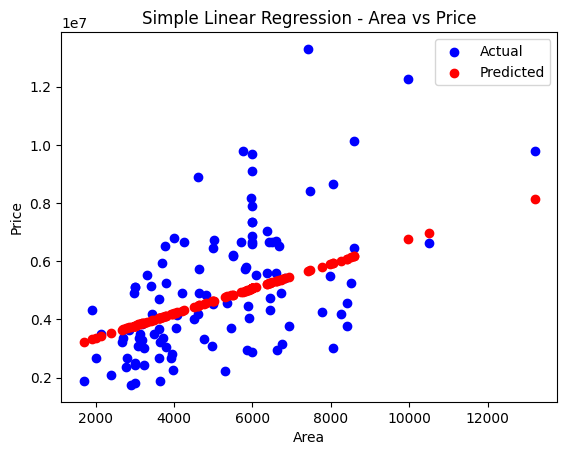

In [21]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred_simple, color='red', label='Predicted')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression - Area vs Price")
plt.legend()
plt.show()